## Linear Equations using the Echelon or Gauss-Jordan Methods
Version/Date: Sept 26, 2017

### Exercise
>PREDICT_400-DL_SEC56
>Wk2 Module

### File(s)
Wk2LinearEq.ipynb

### Instructions
Present a system of equations that you have come across professionally (or personally, if that is not an option) that contains three or more linear equations. and three or more variables. Create one if you have to, but be sure to describe the scenario. Follow up by solving your set of equations using both the Echelon and Gauss-Jordan methods. Which method do you prefer? Why?



In [9]:
!pwd

/mnt/c/Users/andrewknight/Dev/MSPA-PREDICT400/Wk2


In [10]:
!python3 --version

Python 3.5.2


In [3]:
%%markdown
This business example looks at the following system of linear equations to determine product model costs using C(x)=ax+b, 
where the Total Cost C is determined by the variable cost **_x_** times the number of units **_a_** plus the fixed cost **_b_**.

If Revenue is equal to the price per unit times the number of units, than we want to use the system of linear equations
to determine the number of each type of model we should produce using
P(a) = R(a) - C(a) = (z * a) - (a * x + b) = a*(z - x) + b
Assume a fixed cost of 1500 for each model. Unit price is **_z_**.

#> Model A Price: 490 USD; Cost: 365 USD
#> Model B Price: 410 USD; Cost: 300 USD
#> Model C Price: 550 USD; Cost: 415 USD

> Model A Revenue Target: 120000 USD; Cost: 365 USD; Price

> Model B Revenue Target: 80000 USD

#> Model C Revenue Target: 75000 USD
        
We want to determine the best mix of new model units and expected revenue by solving the system of linear equations. 
For this exercise, we will use the both the Echelon and Gauss-Jordan methods to solve for the optimal combination.

We need to find target unit count and estimated total revenue for the system.
We could write the Profit data above in the form.

> P(A) = y1 = (490-365)a + 1500 = 125*a + 1500

> P(A) = y2 = (410 - 300)a + 1500 = 110*a + 1800

#> P(A) = y3 = (550 - 415)a + 1500 = 135*a + 1850


So how many of each model, and at what cost should we price them to achieve the desired revenue?

This business example looks at the following system of linear equations to determine product model costs using C(x)=ax+b, 
where the Total Cost C is determined by the variable cost **_x_** times the number of units **_a_** plus the fixed cost **_b_**.

If Revenue is equal to the price per unit times the number of units, than we want to use the system of linear equations
to determine the number of each type of model we should produce using
P(a) = R(a) - C(a) = (price * a) - (a * cost + b).
Assume a fixed cost of 1500 for each model.

> Model A Price: 490 USD; Cost: 365 USD

> Model B Price: 410 USD; Cost: 300 USD

> Model C Price: 550 USD; Cost: 415 USD

        > Model A Price: 490 USD; Cost: 365 USD

> Model B Price: 410 USD; Cost: 300 USD

> Model C Price: 550 USD; Cost: 415 USD
We want to determine the best mix of new model units to hit a certain revenue number by solving the system of linear equations. 
For this exercise, we will use the both the Echelon and Gauss-Jordan methods to solve for the optimal combination.

We could write the data above in the form

> y1(a) = (490-365)a + 1500 = 125*a + 1500

> y2(a) = (410 - 300)a + 1500 = 110*a + 1500 

> y3(a) = (550 - 415)a + 1500 = 135*a + 1500 

In [75]:
import numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# test
A = np.matrix([[1,1,1],[12,16,20],[1.00,1.25,1.40]])
#A = np.matrix([[1,1,1],[12,16,20],[1.00,2.00,3.00]])
print('A is \n' + str(A))
A_inv = np.linalg.inv(A)
print('\nA_inv is \n' + str(A_inv) + '\n')
#B = np.matrix([[23],[376],[28.45]])
B = np.matrix([[23],[376],[48]])

X = A_inv * B
print('\nSoln is \n' + str(X))

#soln2 = np.linalg.solve(A_inv,B)
#print('\nSoln2 is \n' + str(soln2))

print('check soln')
allgood = np.allclose(np.dot(A, X), B)
print(allgood)


A is 
[[  1.     1.     1.  ]
 [ 12.    16.    20.  ]
 [  1.     1.25   1.4 ]]

A_inv is 
[[  6.5     0.375 -10.   ]
 [ -8.     -1.     20.   ]
 [  2.5     0.625 -10.   ]]


Soln is 
[[-189.5]
 [ 400. ]
 [-187.5]]
check soln
True



Daily Orders

[[ 456.9]
 [-173.6]
 [-183.3]]

matrix A [[ 490    1 -490]
 [ 410    1 -410]
 [ 550    1 -550]]

matrix B [[150]
 [180]
 [185]]
[[  6.75675674e-03]
 [  1.65135135e+02]
 [ -6.75675678e-03]]


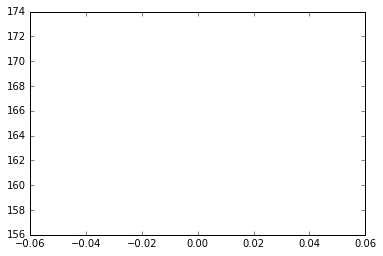

In [74]:
# from the info above we can represent this as an augmented matrix
#mA = [[125,-1],[110, -1]]
#mX = np.array(x,y)
#mB =np.array([-1500],[-1800])
#invmA = np.inv(mA)
#result = np.inalg.solve(invmA,mB)

#TODO: fix this, see Lial Pg 97-99 and my previous A.T example

# Example from Lial Pg102 Ex#59:
#M= [[2, 4, 2], [2, 1, 2], [2, 1, 3]]
M = [[1,1,1],[410,490,550],[300,340,420]]
M= np.matrix(M)
#O= [72,48,60]
O = [100,1450,1060]
O= np.transpose(np.matrix(O))
result= np.linalg.solve(M,O)
print ('\nDaily Orders\n')
print (result)

A = np.matrix([[490,1,-490],
               [410,1,-410],
               [550,1,-550]])
#Ainv = np.linalg.inv(A)
#Ainv = np.transpose(A)
B = np.matrix([[150],[180],[185]])
print('\nmatrix A ' + str(A))
print('\nmatrix B ' + str(B))
#Bt = np.transpose(B)
#print('transpose of B ' + str(Bt))
lsq = np.linalg.lstsq(A,B)[0]
#solveit = np.linalg.solve(A,B)
print(lsq)
np.linspace(-10,10,2 )
plt.plot(lsq[0] + lsq[1] + lsq[2])
plt.show()



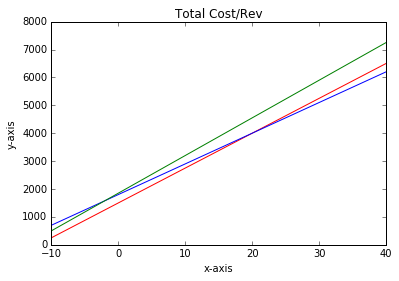

In [10]:
x = np.linspace(-10,40,100)
y1 = (125)*x + 1500
y2 = (110)*x + 1800
y3 = (135)*x + 1850

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Total Cost/Rev')
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')
plt.plot(x, y3, 'g')
plt.show()

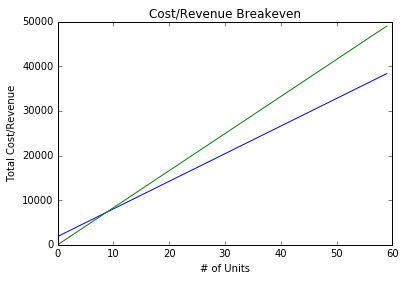

In [13]:
# C(x) = a*x + b
x1 = np.linspace(0, 100, 60)
cost = 365 * x1 + 1850

# Selling price per unit is $450
# R(x) = selling price per unit (# of units)
# P(x) = R(x)-C(x)
rev = 490 * x1
profit = rev - cost

plt.plot(cost, 'b')
plt.plot(rev, 'g')
#plt.plot(profit, 'r')
plt.title('Cost/Revenue Breakeven')
plt.xlabel('# of Units')
plt.ylabel('Total Cost/Revenue')
plt.show()

# the resulting plot gives the break even point for these values.